Linear Regression

#### Y = mX + b

Y --> Dependent Value

X --> Independent Value

w --> Weight

b --> bias

#### Gradient Descent

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms.
It is used for updating the parameters of the learning model

w = w -a*dw

b = b -a*db

#### Learning Rate

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while 
moving towards a minimum of a loss funcation

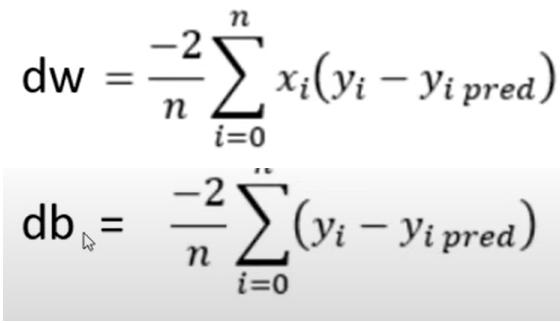

In [1]:
#importing numpy libraries
import numpy as np

### Linear Regression

In [63]:
class Linear_Regression():
    
    #initiating the parameters(learning rate & no of iteration)
    def __init__(self, learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    #
    def fit(self,X,Y):
        #no of training examples & no. of features
        self.m, self.n = X.shape  #no of rows and columns
        
        #initiating the weight & bias of model
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        #implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
            
        
    
    def update_weights(self):
        
        Y_prediction = self.predict(self.X)
        
        #calculate gradients
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction))/self.m
        
        db = - 2 * np.sum(self.Y - Y_prediction)/self.m
        
        #updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        
    
    def predict(self,X):
        
        return X.dot(self.w) + self.b
        
        

#### Using Linear Regression Model for prediction

In [64]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [65]:
#loading dataset to pandas dataframe
salary_data = pd.read_csv(r"C:\Users\bhara\Downloads\salary_data.csv")

In [66]:
#checking the first 5 rows of data
salary_data.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [67]:
#checking total rows and columns in data
salary_data.shape

(30, 2)

In [68]:
#checking any missing values in dataset
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [69]:
#getting info
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [70]:
#getting statistical reference
salary_data.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

#### Splitting the feature and target

In [71]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [72]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


#### Splitting the dataset into training and test data

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.33,random_state=2)

In [74]:
print(X.shape,X_train.shape,X_test.shape)

(30, 1) (20, 1) (10, 1)


#### Training Linear Regression Model

In [75]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [76]:
model.fit(X_train,Y_train)

In [77]:
#printing the parameters values
print("weight = ",model.w[0])
print("bias = ",model.b)

weight =  9514.400999035135
bias =  23697.406507136307


y = 9514(x) + 23697

salary = 9514(experience) + 23697

#### predict the salary value for test data

In [78]:
test_data_prediction = model.predict(X_test)

In [79]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


In [81]:
train_data_prediction = model.predict(X_train)

In [82]:
print(train_data_prediction)

[ 51289.16940434 115035.65609787  61755.01050328  44629.08870501
  60803.57040337  72220.85160222 121695.7367972  109327.01549845
  74123.73180202  37969.00800569  54143.48970405 114084.21599797
 106472.69519874  79832.37240144  61755.01050328  98861.17439951
 123598.61699701  62706.45060318  70317.97140241  54143.48970405]


#### Visualizating predicted and actual values

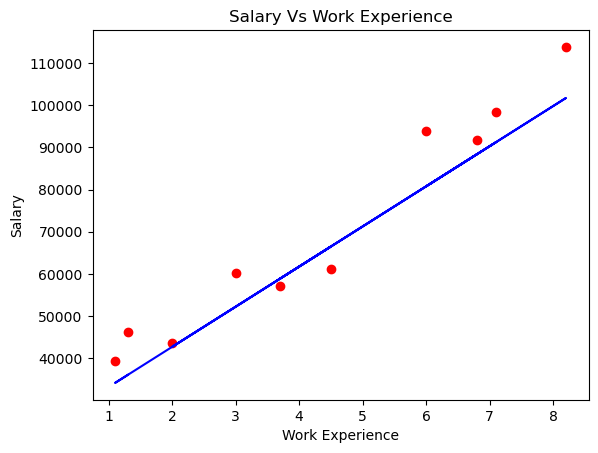

In [88]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction, color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary Vs Work Experience")
plt.show()

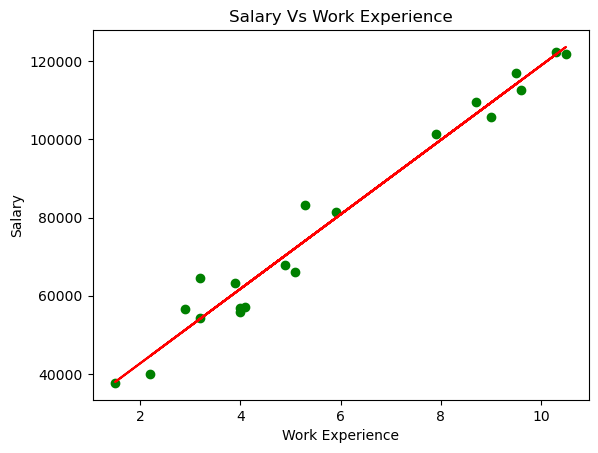

In [89]:
plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,train_data_prediction, color='red')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary Vs Work Experience")
plt.show()